In [1]:
!pip install pywaffle -q
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go, express as px
from pywaffle import Waffle
import numpy as np
import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_ocorrencias = pd.read_csv('https://raw.githubusercontent.com/igor-diniz/MECD-Statistics/main/data/ocorrencia.csv', sep=';', error_bad_lines=False,  encoding='latin-1')
df_tipo_ocorrencia = pd.read_csv('https://raw.githubusercontent.com/igor-diniz/MECD-Statistics/main/data/ocorrencia_tipo.csv', sep=';', error_bad_lines=False,  encoding='latin-1')
df_aeronave = pd.read_csv('https://raw.githubusercontent.com/igor-diniz/MECD-Statistics/main/data/aeronave.csv', sep=';', error_bad_lines=False,  encoding='latin-1')
df_fator = pd.read_csv('https://raw.githubusercontent.com/igor-diniz/MECD-Statistics/main/data/fator_contribuinte.csv', sep=';', error_bad_lines=False,  encoding='latin-1')


In [3]:
df_ocorrencias.set_index('codigo_ocorrencia', inplace=True)
df_tipo_ocorrencia.set_index('codigo_ocorrencia1', inplace=True)
df_aeronave.set_index('codigo_ocorrencia2', inplace=True)
df_fator.set_index('codigo_ocorrencia3', inplace=True)

In [4]:
df_fator

,fator_nome,fator_aspecto,fator_condicionante,fator_area
codigo_ocorrencia3,,,,
81195,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
81195,ATITUDE,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
81195,MANUTENÇÃO DA AERONAVE,DESEMPENHO DO SER HUMANO,MANUTENÇÃO DA AERONAVE,FATOR OPERACIONAL
81195,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
81195,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
...,...,...,...,...
45331,FRASEOLOGIA DO ÓRGÃO ATS,DESEMPENHO DO SER HUMANO,PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO,FATOR OPERACIONAL
45331,LIDERANÇA,ASPECTO PSICOLÓGICO,PSICOSSOCIAL,FATOR HUMANO
45331,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO


In [4]:
df_ocorrencias.drop(['codigo_ocorrencia1','codigo_ocorrencia2','codigo_ocorrencia3','codigo_ocorrencia4'], inplace=True, axis=1)

In [6]:
df_ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8778 entries, 82047 to 28256
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ocorrencia_classificacao        8778 non-null   object
 1   ocorrencia_latitude             6200 non-null   object
 2   ocorrencia_longitude            6200 non-null   object
 3   ocorrencia_cidade               8778 non-null   object
 4   ocorrencia_uf                   8778 non-null   object
 5   ocorrencia_pais                 8778 non-null   object
 6   ocorrencia_aerodromo            8778 non-null   object
 7   ocorrencia_dia                  8778 non-null   object
 8   ocorrencia_hora                 8776 non-null   object
 9   investigacao_aeronave_liberada  8475 non-null   object
 10  investigacao_status             7364 non-null   object
 11  divulgacao_relatorio_numero     6913 non-null   object
 12  divulgacao_relatorio_publicado  8778 non-nu

In [7]:
df_fator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4867 entries, 81195 to 45331
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fator_nome           4867 non-null   object
 1   fator_aspecto        4867 non-null   object
 2   fator_condicionante  4867 non-null   object
 3   fator_area           4867 non-null   object
dtypes: object(4)
memory usage: 190.1+ KB


In [8]:
df_aeronave.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8867 entries, 82047 to 28256
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   aeronave_matricula           6228 non-null   object 
 1   aeronave_operador_categoria  6228 non-null   object 
 2   aeronave_tipo_veiculo        6228 non-null   object 
 3   aeronave_fabricante          6228 non-null   object 
 4   aeronave_modelo              6227 non-null   object 
 5   aeronave_tipo_icao           6228 non-null   object 
 6   aeronave_motor_tipo          6195 non-null   object 
 7   aeronave_motor_quantidade    6228 non-null   object 
 8   aeronave_pmd                 6228 non-null   float64
 9   aeronave_pmd_categoria       6228 non-null   float64
 10  aeronave_assentos            5932 non-null   float64
 11  aeronave_ano_fabricacao      5972 non-null   float64
 12  aeronave_pais_fabricante     6228 non-null   object 
 13  aeronave_pais

In [9]:
df_fator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4867 entries, 81195 to 45331
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fator_nome           4867 non-null   object
 1   fator_aspecto        4867 non-null   object
 2   fator_condicionante  4867 non-null   object
 3   fator_area           4867 non-null   object
dtypes: object(4)
memory usage: 190.1+ KB


In [10]:
df_fator["fator_area"].unique()

array(['FATOR OPERACIONAL', 'FATOR HUMANO', 'OUTRO', 'FATOR MATERIAL'],
      dtype=object)

In [11]:
df_aeronave["aeronave_ano_fabricacao"].sort_values().unique()

array([   0., 1936., 1940., 1942., 1945., 1946., 1947., 1948., 1949.,
       1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
       2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012.,
       2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021.,
       2022., 9999.,   nan])

In [5]:
df = df_ocorrencias.join(df_aeronave).join(df_fator).join(df_tipo_ocorrencia)
df.head()

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,...,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
28256,ACIDENTE,-22.2180555556,-47.1763888889,MOGI GUAÇU,SP,BRASIL,***,07/01/2007,11:30:00,***,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT
28335,ACIDENTE,-23.3444444444,-51.0633333333,LONDRINA,PR,BRASIL,***,19/01/2007,12:30:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VOO CONTROLADO CONTRA O TERRENO,VOO CONTROLADO CONTRA O TERRENO,CFIT
28355,ACIDENTE,-17.2541666667,-43.8536111111,BOCAIÚVA,MG,BRASIL,***,18/01/2007,09:10:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALHA ESTRUTURAL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
28375,ACIDENTE,-23.6122222222,-51.385,APUCARANA,PR,BRASIL,***,26/01/2007,18:15:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL
28377,ACIDENTE,***,***,IMPERATRIZ,MA,BRASIL,***,27/01/2007,11:18:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP


In [6]:
df["ocorrencia_dia"] = pd.to_datetime(df["ocorrencia_dia"], format="%d/%m/%Y")

df["idade_aeronave"] = df["ocorrencia_dia"].dt.year - df["aeronave_ano_fabricacao"]
df.tail()

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,...,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,idade_aeronave
82037,INCIDENTE,-12.90861111111,-38.3225,SALVADOR,BA,BRASIL,SBSV,2023-04-18,11:25:00,SIM,...,NENHUM,0.0,NaN,NaN,NaN,NaN,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,10.0
82038,INCIDENTE,-23.43555555555,-46.47305555555,GUARULHOS,SP,BRASIL,SBGR,2023-04-18,09:55:00,SIM,...,NENHUM,0.0,NaN,NaN,NaN,NaN,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,10.0
82039,INCIDENTE,-22.81,-43.25055555555,RIO DE JANEIRO,RJ,BRASIL,SBGL,2023-04-17,13:20:00,SIM,...,NENHUM,0.0,NaN,NaN,NaN,NaN,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,2023.0
82045,INCIDENTE,-25.53166666666,-49.17611111111,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,SBCT,2023-04-09,20:50:00,SIM,...,NENHUM,0.0,NaN,NaN,NaN,NaN,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,2023.0
82047,INCIDENTE,-20.46944444444,-54.67027777777,CAMPO GRANDE,MS,BRASIL,SBCG,2023-04-19,13:25:00,SIM,...,NENHUM,0.0,NaN,NaN,NaN,NaN,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,10.0


### Cleaning Data


Variáveis:
- aeronave_ano_fabricacao (Tabela aeronave)
- aeronave_nivel_dano (Tabela aeronave)
- aeronave_fatalidades_total (Tabela aeronave)
- fator_aspecto (Tabela fator_contribuinte)
- ocorrencia_classificacao (Tabela ocorrencias)
- ocorrencia_dia (Tabela ocorrencias)
- ocorrencia_hora (Tabela ocorrencias)

In [7]:
dados = df[["aeronave_ano_fabricacao", "aeronave_nivel_dano", "aeronave_fatalidades_total", "fator_area", "ocorrencia_classificacao", "ocorrencia_dia", "idade_aeronave"]].copy()


In [8]:
dados['ocorrencia_dia'] = pd.to_datetime(df['ocorrencia_dia'], format='%d/%m/%Y')
dados.dropna(inplace=True)

In [16]:
#np.set_printoptions(suppress=True)
np.sort(dados["idade_aeronave"].unique())

array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.300e+01,
       2.400e+01, 2.500e+01, 2.600e+01, 2.700e+01, 2.800e+01, 2.900e+01,
       3.000e+01, 3.100e+01, 3.200e+01, 3.300e+01, 3.400e+01, 3.500e+01,
       3.600e+01, 3.700e+01, 3.800e+01, 3.900e+01, 4.000e+01, 4.100e+01,
       4.200e+01, 4.300e+01, 4.400e+01, 4.500e+01, 4.600e+01, 4.700e+01,
       4.800e+01, 4.900e+01, 5.000e+01, 5.100e+01, 5.200e+01, 5.300e+01,
       5.400e+01, 5.500e+01, 5.600e+01, 5.700e+01, 5.800e+01, 5.900e+01,
       6.000e+01, 6.100e+01, 6.200e+01, 6.300e+01, 6.400e+01, 6.500e+01,
       6.600e+01, 6.700e+01, 6.800e+01, 6.900e+01, 7.000e+01, 7.100e+01,
       7.200e+01, 7.300e+01, 7.500e+01, 7.600e+01, 2.012e+03, 2.013e+03,
       2.014e+03, 2.017e+03, 2.018e+03, 2.019e+03, 

In [9]:
dados = dados[dados['aeronave_ano_fabricacao'] > 0]
dados = dados[dados['aeronave_nivel_dano'] != "***"]


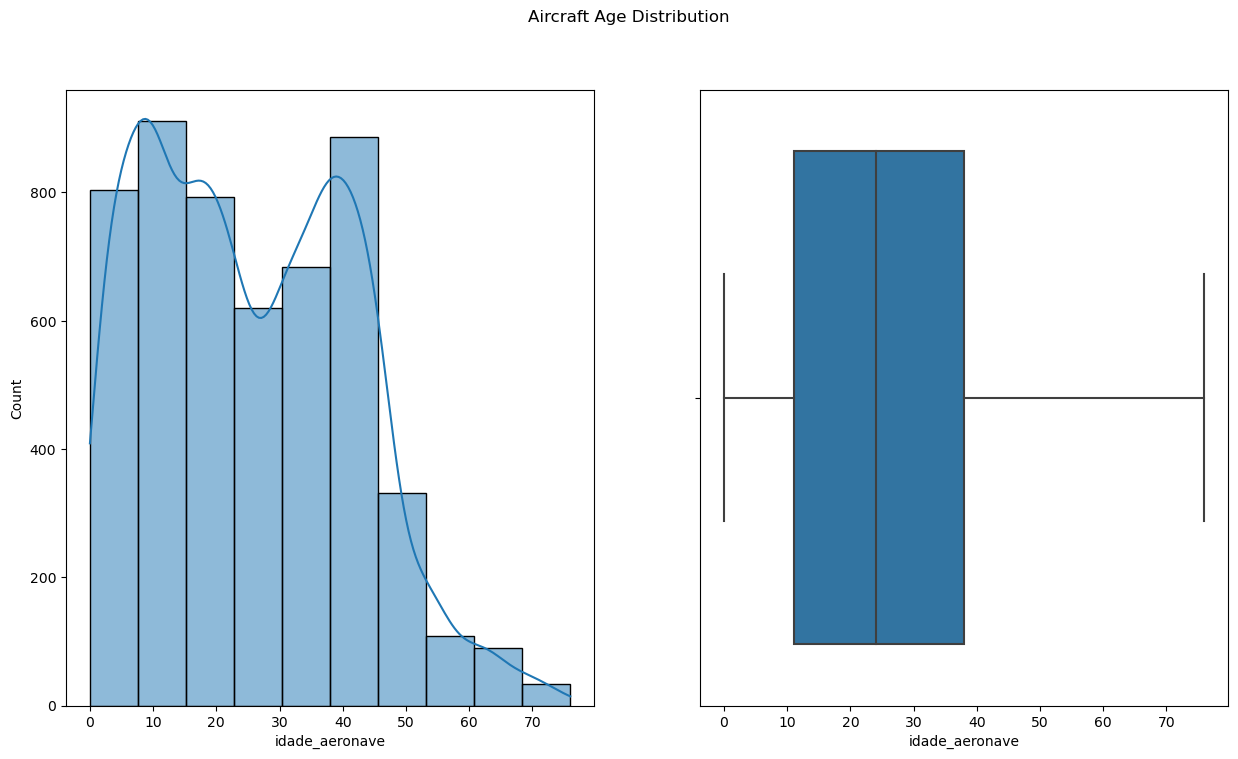

In [18]:
fig, axs = plt.subplots(1,2, figsize=(15, 8))
sns.histplot(data=dados, x="idade_aeronave", kde=True, bins=10, ax=axs[0])
sns.boxplot(data=dados, x="idade_aeronave", ax=axs[1])
fig.suptitle("Aircraft Age Distribution")
plt.show()

In [19]:
q1= dados[dados["idade_aeronave"] < 11]
q2= dados[dados["idade_aeronave"].between(11, 24)]
q3= dados[dados["idade_aeronave"].between(24,38)]
q4= dados[dados["idade_aeronave"] >= 38]
q234 = dados[dados["idade_aeronave"] > 11]

In [20]:
dados.describe()

,aeronave_ano_fabricacao,aeronave_fatalidades_total,idade_aeronave
count,5258.000000,5258.000000,5258.000000
mean,1990.858692,0.629897,25.534994
std,16.222558,1.454515,16.230823
min,1945.000000,0.000000,0.000000
25%,1977.000000,0.000000,11.000000
50%,1992.000000,0.000000,24.000000
75%,2006.000000,0.000000,38.000000
max,2021.000000,10.000000,76.000000


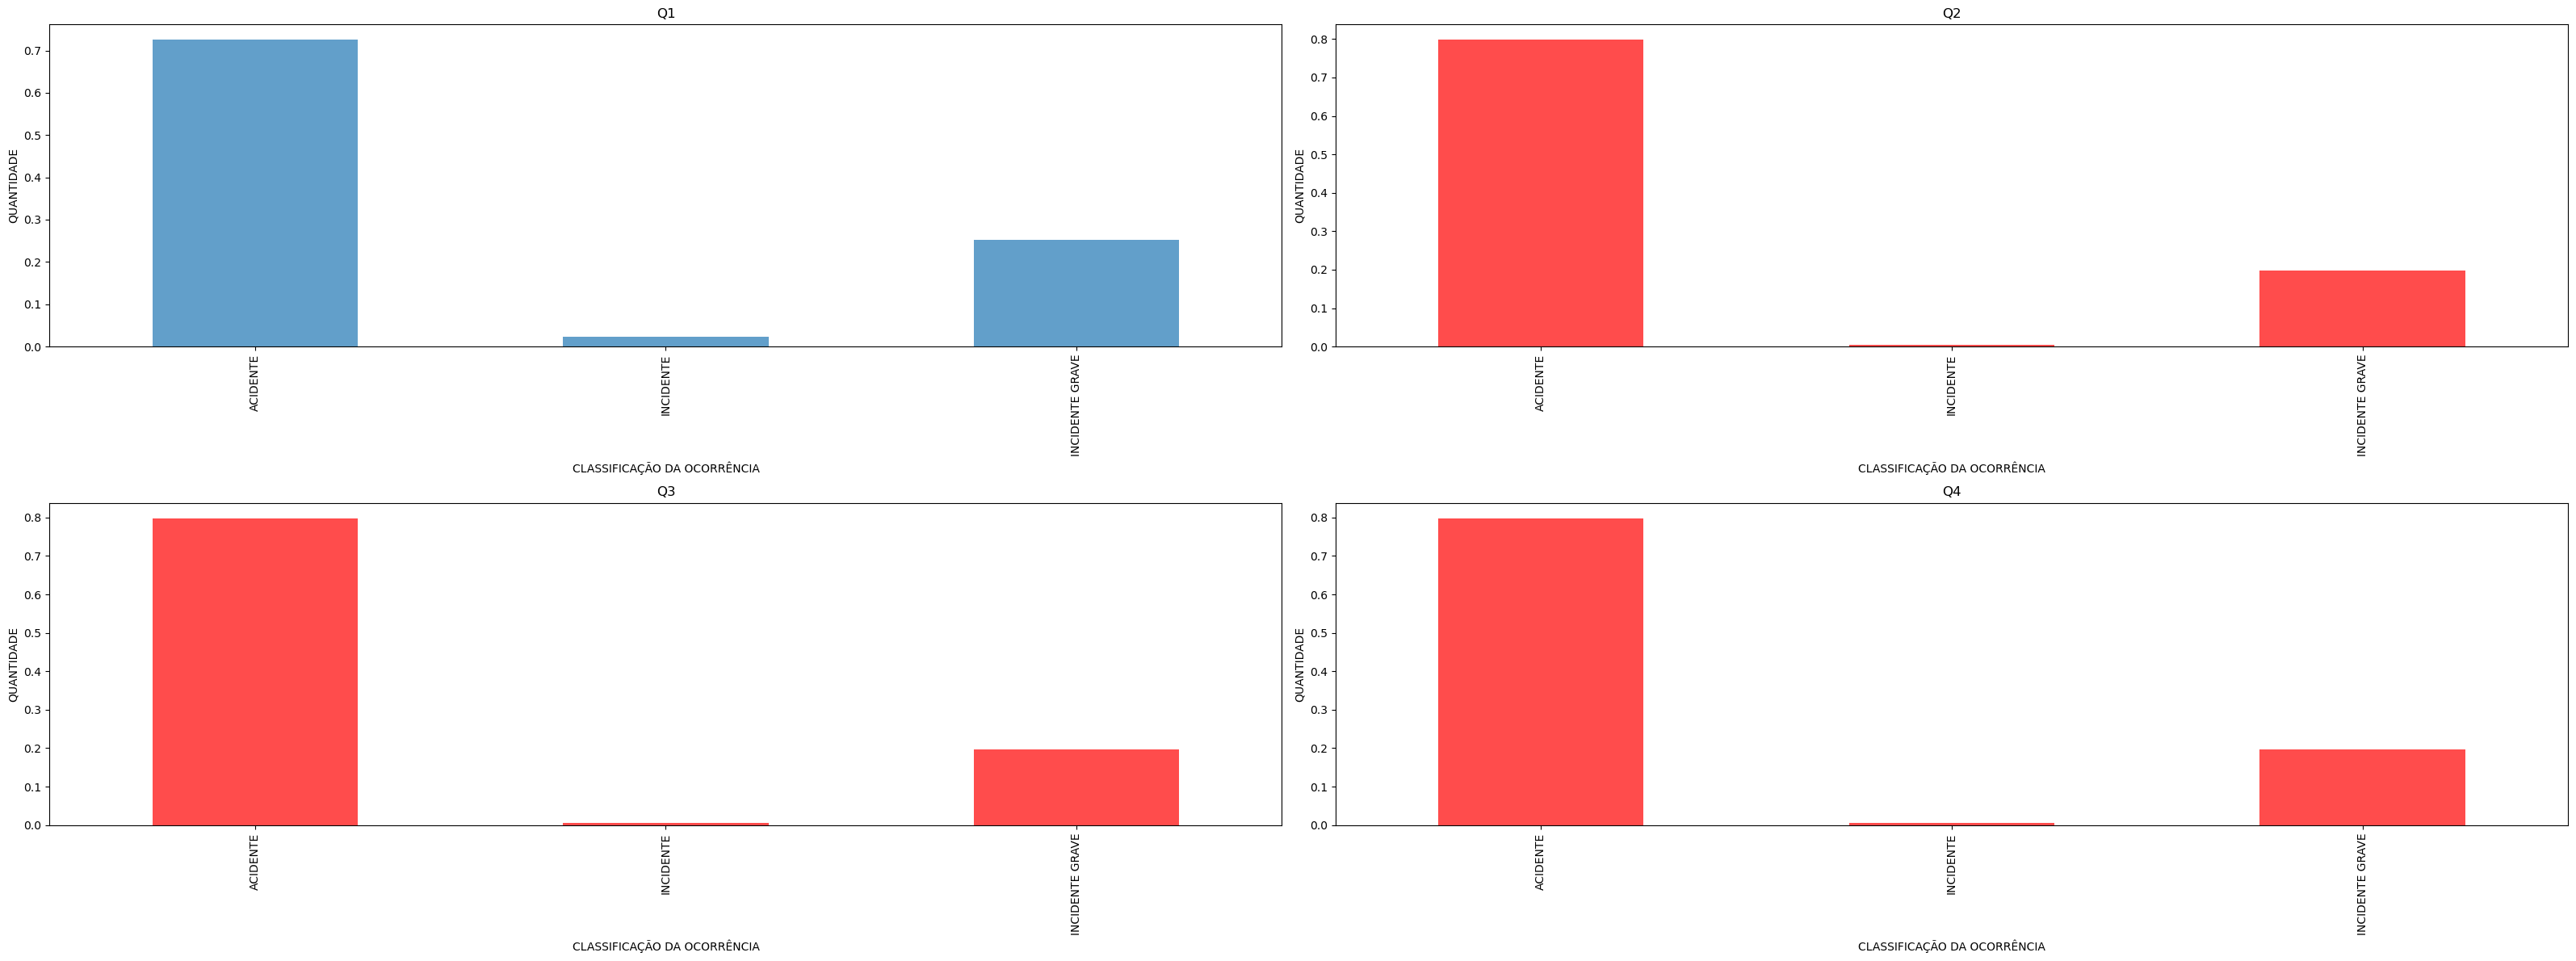

In [21]:
classificacao_q1 = q1.groupby('ocorrencia_classificacao').size()
classificacao_q1 = (classificacao_q1/ classificacao_q1.sum())


classificacao_q2 = q2.groupby('ocorrencia_classificacao').size()
classificacao_q2 = (classificacao_q2/ classificacao_q2.sum())

classificacao_q3 = q2.groupby('ocorrencia_classificacao').size()
classificacao_q3 = (classificacao_q3/ classificacao_q3.sum())

classificacao_q4 = q2.groupby('ocorrencia_classificacao').size()
classificacao_q4 = (classificacao_q4/ classificacao_q4.sum())

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(32, 12))

# Plot the first bar chart (left subplot)
plot_classificacao_q1 = classificacao_q1.plot(kind='bar', ax=axs[0,0], alpha=0.7)
axs[0,0].set_title('Q1')
axs[0,0].set_xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
axs[0,0].set_ylabel('QUANTIDADE')

# Plot the second bar chart (right subplot)
plot_classificacao_q2 = classificacao_q2.plot(kind='bar', ax=axs[0,1], alpha=0.7, color="red")
axs[0,1].set_title('Q2')
axs[0,1].set_xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
axs[0,1].set_ylabel('QUANTIDADE')

# Plot the Third bar chart (left subplot)
plot_classificacao_q3 = classificacao_q3.plot(kind='bar', ax=axs[1,0], alpha=0.7, color="red")
axs[1,0].set_title('Q3')
axs[1,0].set_xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
axs[1,0].set_ylabel('QUANTIDADE')

# Plot the fourth bar chart (right subplot)
plot_classificacao_q4 = classificacao_q4.plot(kind='bar', ax=axs[1,1], alpha=0.7, color="red")
axs[1,1].set_title('Q4')
axs[1,1].set_xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
axs[1,1].set_ylabel('QUANTIDADE')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

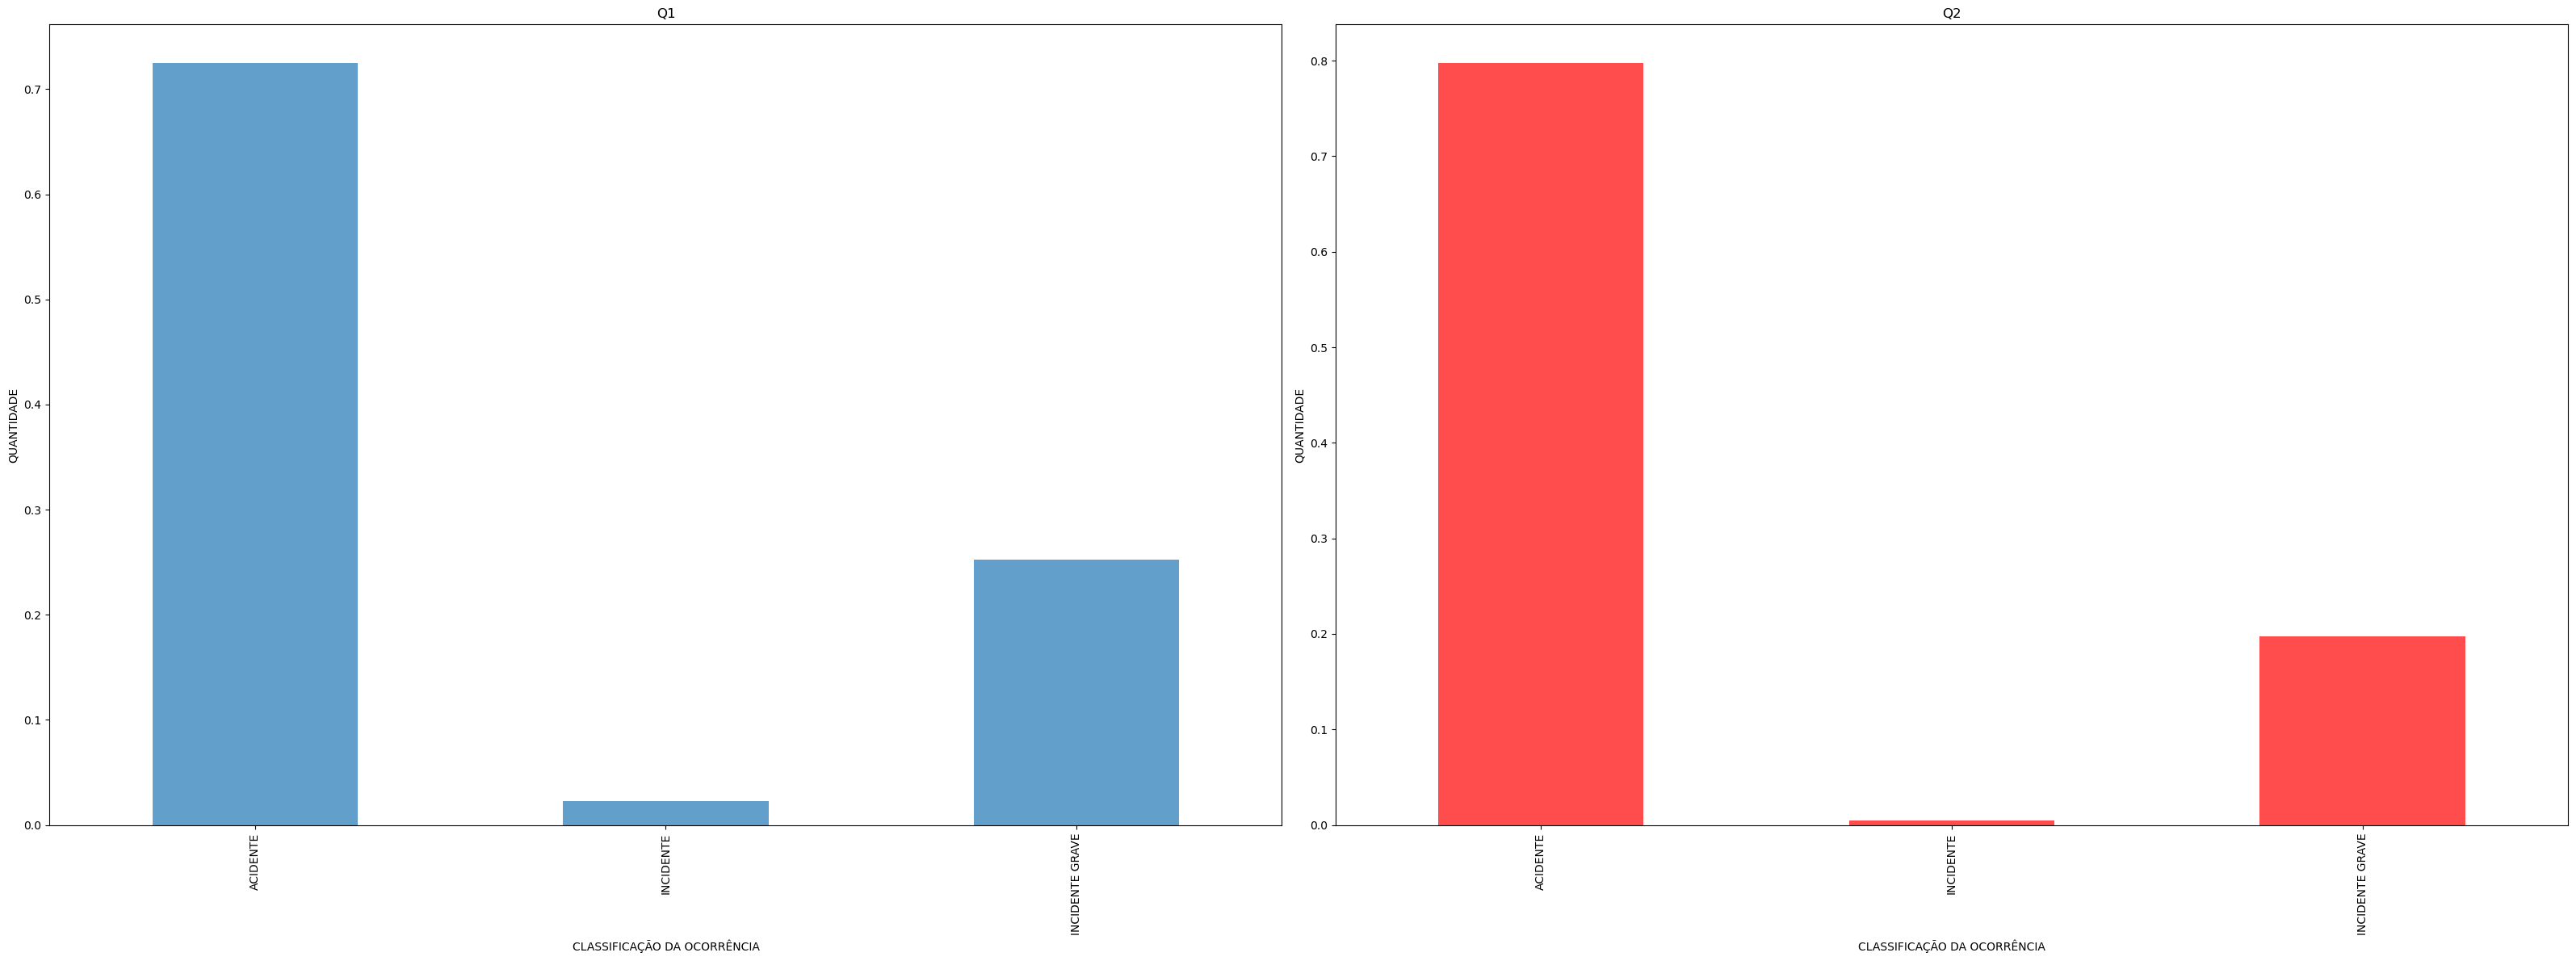

In [23]:
classificacao_q1 = q1.groupby('ocorrencia_classificacao').size()
proportion_q1 = (classificacao_q1/ classificacao_q1.sum())


classificacao_q234 = q2.groupby('ocorrencia_classificacao').size()
proportion_q234 = (classificacao_q234/ classificacao_q234.sum())


# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(32, 12))

# Plot the first bar chart (left subplot)
plot_q1 = proportion_q1.plot(kind='bar', ax=axs[0], alpha=0.7)
axs[0].set_title('Q1')
axs[0].set_xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
axs[0].set_ylabel('QUANTIDADE')

# Plot the second bar chart (right subplot)
plot_q234 = proportion_q234.plot(kind='bar', ax=axs[1], alpha=0.7, color="red")
axs[1].set_title('Q2')
axs[1].set_xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
axs[1].set_ylabel('QUANTIDADE')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [24]:
"""if p_value < alpha:
    print(f"Reject the null hypothesis. We can afirm with a {confidence_level}% confidence_level that the proportion of accidents of older aircrafts is higher than newer ones.\
    P value = {p_value}")
else:
    print("Don´t Reject the null hypothesis. There´s no enough evidence to confirm that older aircrafts have a higher proportion of accidents than newer ones.")
"""

'if p_value < alpha:\n    print(f"Reject the null hypothesis. We can afirm with a {confidence_level}% confidence_level that the proportion of accidents of older aircrafts is higher than newer ones.    P value = {p_value}")\nelse:\n    print("Don´t Reject the null hypothesis. There´s no enough evidence to confirm that older aircrafts have a higher proportion of accidents than newer ones.")\n'

### Checking Null Hypothesis
  - H0 = There´s no difference between the proportion of accidents in aircrafts older than 11 years then on aircrafts newer than 11 years
  - H1 = There´s a difference between the proportion of accidents in aircrafts older than 11 years then on aircrafts newer than 11 years

In [25]:
import numpy as np
import scipy.stats as stats

# Given data
newer_sample_size = len(q1)
older_sample_size = len(q1)
older_sample_proportion = proportion_q234["ACIDENTE"]
confidence_level = 0.95

# Calculate the sample proportion
newer_sample_proportion = proportion_q1["ACIDENTE"]

# Calculate the standard error
standard_error = np.sqrt(
    ((older_sample_proportion * (1 - older_sample_proportion)) / older_sample_size) # OLDER SE
    +
    ((newer_sample_proportion * (1 - newer_sample_proportion)) / newer_sample_size) # NEWER SE
)

# Calculate the critical value (Z) for the desired confidence level
alpha = 1 - confidence_level
z_critical = stats.norm.ppf(1 - alpha / 2)

# Calculate the margin of error for the confidence interval
margin_of_error = z_critical * standard_error

# Calculate the confidence interval
proportion_diff = older_sample_proportion - newer_sample_proportion
confidence_interval_lower = proportion_diff - margin_of_error
confidence_interval_upper = proportion_diff + margin_of_error

def to_percentual_points(n):
  return round(n*100, 2)
print(f"We can confirm with a {confidence_level}% confindence level that older aircrafts tend to have\
 {to_percentual_points(confidence_interval_lower)}PP to {to_percentual_points(confidence_interval_upper)}PP more accidents than newer ones")


We can confirm with a 0.95% confindence level that older aircrafts tend to have 3.88PP to 10.67PP more accidents than newer ones


In [25]:
# print(sample_proportion)
# print(claimed_accidents)

# Damage level analysis

## Discritized age distribution

In [10]:
quartiles = dados["idade_aeronave"].quantile([0.25, 0.5, 0.75])
quartiles

0.25    11.0
0.50    24.0
0.75    38.0
Name: idade_aeronave, dtype: float64

In [11]:
# implementing discretization for the aircraft age
age_max = dados["idade_aeronave"].max() + 1
intervals = [0]
intervals.extend(quartiles.values + 1)     # +1 because the upper limit of intervals is opend
intervals.append(age_max)

dados["idade_aeronave"] = dados["idade_aeronave"].astype(int)

dados["idade_discretizada"] = pd.cut(dados["idade_aeronave"], bins=intervals, right=False)

dados["idade_discretizada"].sort_values()

45331     [0.0, 12.0)
61031     [0.0, 12.0)
61014     [0.0, 12.0)
61014     [0.0, 12.0)
61014     [0.0, 12.0)
             ...     
79206    [39.0, 77.0)
79206    [39.0, 77.0)
79206    [39.0, 77.0)
48727    [39.0, 77.0)
53377    [39.0, 77.0)
Name: idade_discretizada, Length: 5258, dtype: category
Categories (4, interval[float64, left]): [[0.0, 12.0) < [12.0, 25.0) < [25.0, 39.0) < [39.0, 77.0)]

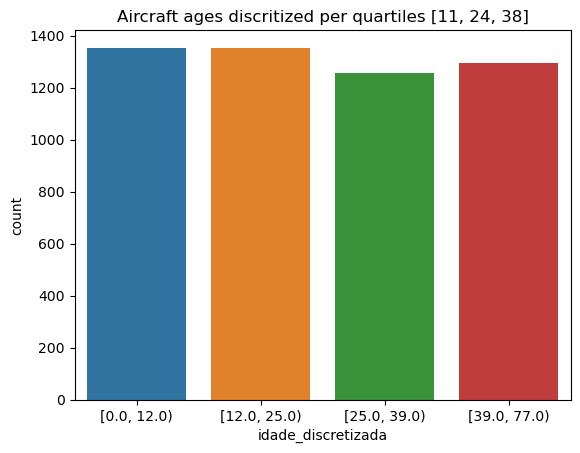

In [12]:
sns.countplot(data=dados, x="idade_discretizada")
plt.title("Aircraft ages discritized per quartiles [11, 24, 38]")
plt.show()

## Damage Levels Proportions

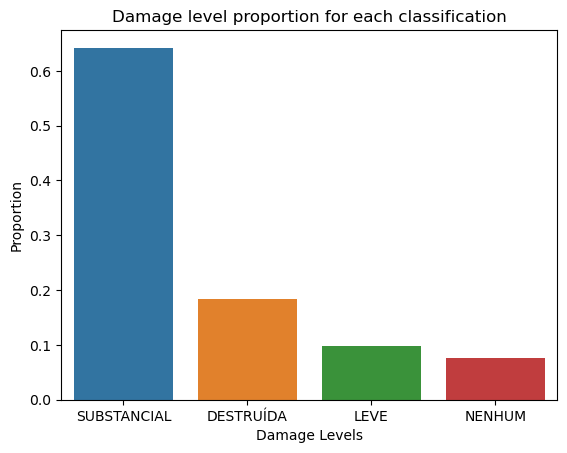

In [13]:
sns.barplot(x=dados["aeronave_nivel_dano"].value_counts(normalize=True).index,
             y=dados["aeronave_nivel_dano"].value_counts(normalize=True)
            )
plt.title("Damage level proportion for each classification")
plt.ylabel("Proportion")
plt.xlabel("Damage Levels")
plt.show()

## Proportion of Discritized Ages Per Damage Level

In [14]:
proportions_damage_age = pd.crosstab(dados["idade_discretizada"], dados["aeronave_nivel_dano"], normalize="index")
proportions_damage_age

aeronave_nivel_dano,DESTRUÍDA,LEVE,NENHUM,SUBSTANCIAL
idade_discretizada,,,,
"[0.0, 12.0)",0.158050,0.119645,0.147710,0.574594
"[12.0, 25.0)",0.227811,0.119822,0.066568,0.585799
"[25.0, 39.0)",0.163752,0.093800,0.042925,0.699523
"[39.0, 77.0)",0.187017,0.054096,0.042504,0.716383


In [15]:
proportions_damage_age.reset_index(inplace=True)
long_p_damage_age = pd.melt(proportions_damage_age, id_vars=['idade_discretizada'], value_vars=proportions_damage_age.columns.tolist(), var_name='Nivel', value_name='Proportion')
long_p_damage_age

,idade_discretizada,Nivel,Proportion
0,"[0.0, 12.0)",DESTRUÍDA,0.158050
1,"[12.0, 25.0)",DESTRUÍDA,0.227811
2,"[25.0, 39.0)",DESTRUÍDA,0.163752
3,"[39.0, 77.0)",DESTRUÍDA,0.187017
4,"[0.0, 12.0)",LEVE,0.119645
5,"[12.0, 25.0)",LEVE,0.119822
6,"[25.0, 39.0)",LEVE,0.093800
7,"[39.0, 77.0)",LEVE,0.054096
8,"[0.0, 12.0)",NENHUM,0.147710
9,"[12.0, 25.0)",NENHUM,0.066568


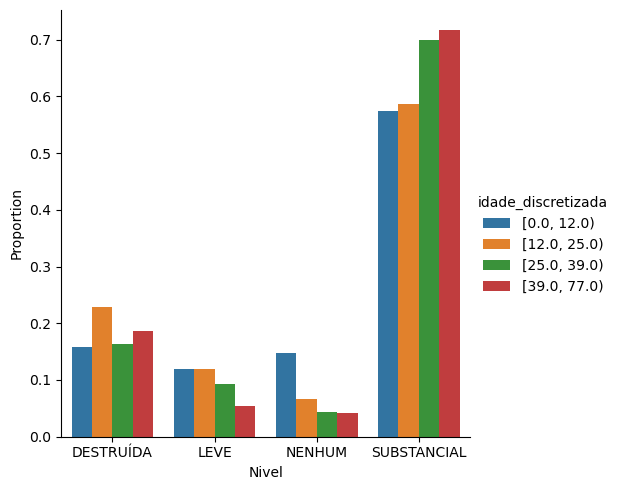

In [20]:
sns.catplot(data=long_p_damage_age, x="Nivel", y="Proportion", hue="idade_discretizada", kind="bar")
plt.show()

Analysing the charts we can propose two hypothesis:

1. The proportion of airplanes with **less than or equal 11 years which had no damage in the occurences** is significantly greater than proportion of airplanes with **more than 11 years**.
2. The proportion of airplanes with **greater than or equal 11 years which had substancial damage in the occurences** is significantly greater than proportion of airplanes with **less than 11 years**

## Checking Hypothesis 1

The proportion of airplanes with **less than 11 years which had no damage in the occurences** is significantly greater than proportion of airplanes with **more than 11 years**.

In [76]:
# taking broad samples
SAMPLE_SIZE = 200
less11 = dados[dados["idade_discretizada"] == pd.Interval(intervals[0], intervals[1], closed='left')].sample(n=SAMPLE_SIZE, replace=False, axis=0, ignore_index=True)
less11.head()

,aeronave_ano_fabricacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_area,ocorrencia_classificacao,ocorrencia_dia,idade_aeronave,idade_discretizada
0,2011.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2019-02-01,8,"[0.0, 12.0)"
1,2016.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2019-05-28,3,"[0.0, 12.0)"
2,2013.0,SUBSTANCIAL,0.0,FATOR HUMANO,ACIDENTE,2014-12-29,1,"[0.0, 12.0)"
3,2009.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2020-01-18,11,"[0.0, 12.0)"
4,2011.0,NENHUM,0.0,FATOR HUMANO,INCIDENTE GRAVE,2018-09-26,7,"[0.0, 12.0)"


In [77]:
more11 = dados[~(dados["idade_discretizada"] == pd.Interval(intervals[0], intervals[1], closed='left'))].sample(n=SAMPLE_SIZE, replace=False, axis=0, ignore_index=True)
more11.head()

,aeronave_ano_fabricacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_area,ocorrencia_classificacao,ocorrencia_dia,idade_aeronave,idade_discretizada
0,1990.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,INCIDENTE GRAVE,2012-05-23,22,"[12.0, 25.0)"
1,1972.0,SUBSTANCIAL,0.0,FATOR HUMANO,ACIDENTE,2017-07-08,45,"[39.0, 77.0)"
2,1998.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2019-04-11,21,"[12.0, 25.0)"
3,1991.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2015-04-06,24,"[12.0, 25.0)"
4,1950.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2012-02-07,62,"[39.0, 77.0)"


**Notice:**
- p̂<sub><=11</sub> represents the proportion of airplanes with less than 11 years which had no damage in the occurences.
- p̂<sub>>11</sub> represents the proportion of airplanes with more than or equal 11 years which had no damage in the occurences.

$H_0$: **There IS NO** difference between proportions of airplanes with less than 11 years and more than or equal 11 years which had no damage.
> p̂<sub><=11</sub> − p̂<sub>>11</sub> = 0  

$H_A$: **There IS** difference between proportions of airplanes with less than 11 years and more than or equal 11 years which had no damage.  
> p̂<sub><=11</sub> - p̂<sub>>11</sub> ≠ 0


**Checking conditions for the sampling distribution of p̂1 − p̂2 to be normal**:

1. **Independence**
- Because the data come from a simple random sample, the observations are independent, both within and between samples.

2. **Success-failure condition**
- Since the null hypothesis is that the proportions are equal, we use the pooled proportion ($p̂_{pooled}$) to verify the success-failure condition and estimate the standard error.
- $p̂_{pooled} = \frac{p̂_1 \ * \ n_1 \ + \ p̂_2 \ * \ n_2}{n_1 + n_2}$
- $n_1 \ * \ p̂_{pooled} \ ≥ \ 10 \ and \ n_1 \ * \ (1 - p̂_{pooled}) ≥ 10$
- $n_2 \ * \ p̂_{pooled} \ ≥ \ 10 \ and \ n_2 \ * \ (1 - p̂_{pooled}) ≥ 10$


In [90]:
p_hat_less11 = less11["aeronave_nivel_dano"].value_counts(normalize=True).NENHUM
print("p-hat less than or equal 11 =", p_hat_less11)

p-hat less than or equal 11 = 0.15


In [91]:
p_hat_more11 = more11["aeronave_nivel_dano"].value_counts(normalize=True).NENHUM
print("p-hat more than 10 =", p_hat_more11)

p-hat more than 10 = 0.03


In [80]:
p_pooled = (p_hat_less11 * SAMPLE_SIZE + p_hat_more11 * SAMPLE_SIZE) / (SAMPLE_SIZE + SAMPLE_SIZE)
print("p-hat pooled =", p_pooled)

p-hat pooled = 0.09


In [81]:
ck1 = p_pooled * SAMPLE_SIZE
ck2 = (1 - p_pooled) * SAMPLE_SIZE

if ck1 >= 10 and ck2 >= 10:
    print("Conditions 𝑛1 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛1 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 met!")
else:
    print("Conditions 𝑛1 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛1 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 DOES NOT met!")

ck3 = p_pooled * SAMPLE_SIZE
ck4 = (1 - p_pooled) * SAMPLE_SIZE

if ck3 >= 10 and ck4 >= 10:
    print("Conditions 𝑛2 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛2 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 met!")
else:
    print("Conditions 𝑛2 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛2 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 DOES NOT met!")

Conditions 𝑛1 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛1 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 met!
Conditions 𝑛2 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛2 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 met!


**As both conditions are satisfied, we can safely model the difference in proportions using a normal distribution!**

### Calculations

#### Standard error for the difference of proportions
$SE = \sqrt{\frac{p̂_{pooled} \ * \ (1 - p̂_{pooled})}{n_1} + \frac{p̂_{pooled} \ * \ (1 - p̂_{pooled})}{n_2}}$

#### Test statistic
$Z^* = \frac{point \ estimate \ - \ null \ value}{SE}$

#### Significance level we will use
$\alpha = 0.05$

In [82]:
SE = sqrt(p_pooled*(1 - p_pooled) / len(less11) + p_pooled*(1 - p_pooled) / len(more11))
print("SE =", SE)

SE = 0.02861817604250837


In [83]:
point_estimate = p_hat_less11 - p_hat_more11
print("Point estimate =", point_estimate)

Point estimate = 0.12


In [84]:
null_value = 0     # it comes from the null hypothesis, since we are considering the difference between proportions 0
print("Null value =", null_value)
print("It comes from the null hypothesis, since we are considering the difference between proportions 0")

Null value = 0
It comes from the null hypothesis, since we are considering the difference between proportions 0


In [85]:
z_score = (point_estimate - null_value) / SE
print("Test statistic (Z*) =", z_score)

Test statistic (Z*) = 4.193139346887673


In [86]:
# p_value is calculate for one-tail and we are using two-tails
# because of this we must double the value encountered
p_value = stats.norm.sf(abs(z_score)) * 2
alpha = 0.05

if p_value < alpha:
    print(f"For a p-value = {p_value} and alpha = {alpha} we REJECT the null hypothesis!")
else: 
    print(f"For a p-value = {p_value} and alpha = {alpha} we DO NOT REJECT the null hypothesis!")

For a p-value = 2.7512032496213586e-05 and alpha = 0.05 we REJECT the null hypothesis!


### Conclusion

Since we have rejected the null hypothesis, we can conclude that **There IS** difference between proportions of airplanes with less than or equal 11 years and more than 11 years which had no damage.

Furthermore, the point estimate indicate that the direction of that
difference is that airplanes with less than or equal 11 years have proportions of occurences with no damage greater than airplanes with more than 11 years.

## Checking Hypothesis 2

The proportion of airplanes with **greater than 11 years which had substancial damage in the occurences** is significantly greater than proportion of airplanes with **more than 11 years**

In [87]:
# taking broad samples
SAMPLE_SIZE_2 = 100
filter_less_11 = dados["idade_discretizada"] == pd.Interval(intervals[0], intervals[1], closed='left')

less11_2 = dados[filter_less_11]
less11_2

,aeronave_ano_fabricacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_area,ocorrencia_classificacao,ocorrencia_dia,idade_aeronave,idade_discretizada
45331,2001.0,NENHUM,0.0,FATOR OPERACIONAL,ACIDENTE,2012-01-06,11,"[0.0, 12.0)"
45331,2001.0,NENHUM,0.0,FATOR HUMANO,ACIDENTE,2012-01-06,11,"[0.0, 12.0)"
45331,2001.0,NENHUM,0.0,FATOR HUMANO,ACIDENTE,2012-01-06,11,"[0.0, 12.0)"
45331,2001.0,NENHUM,0.0,FATOR HUMANO,ACIDENTE,2012-01-06,11,"[0.0, 12.0)"
45331,2001.0,NENHUM,0.0,FATOR HUMANO,ACIDENTE,2012-01-06,11,"[0.0, 12.0)"
...,...,...,...,...,...,...,...,...
81021,2021.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2022-10-02,1,"[0.0, 12.0)"
81021,2021.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2022-10-02,1,"[0.0, 12.0)"
81021,2021.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2022-10-02,1,"[0.0, 12.0)"
81021,2021.0,SUBSTANCIAL,0.0,FATOR HUMANO,ACIDENTE,2022-10-02,1,"[0.0, 12.0)"


In [89]:
more11_2 = dados[~(dados["idade_discretizada"].isin(less11_2["idade_discretizada"]))]
more11_2.head()

,aeronave_ano_fabricacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_area,ocorrencia_classificacao,ocorrencia_dia,idade_aeronave,idade_discretizada
45390,1989.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2012-01-20,23,"[12.0, 25.0)"
45390,1989.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2012-01-20,23,"[12.0, 25.0)"
45392,2000.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2012-01-19,12,"[12.0, 25.0)"
45392,2000.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2012-01-19,12,"[12.0, 25.0)"
45392,2000.0,SUBSTANCIAL,0.0,FATOR OPERACIONAL,ACIDENTE,2012-01-19,12,"[12.0, 25.0)"


**Notice:**
- p̂<sub><=11</sub> represents the proportion of airplanes with less than or equal 11 years which had substancial damage in the occurences.
- p̂<sub>>11</sub> represents the proportion of airplanes with more than 11 years which had substancial damage in the occurences.

$H_0$: **There IS NO** difference between proportions of airplanes with less or equal than 11 years and more than 11 years which had substancial damage.
>  p̂<sub>>11</sub> − p̂<sub><=11</sub> = 0  

$H_A$: **There IS** difference between proportions of airplanes with less than or equal 11 years and more than 11 years which had no damage.  
> p̂<sub>>11</sub> - p̂<sub><=11</sub> ≠ 0


**Checking conditions for the sampling distribution of p̂1 − p̂2 to be normal**:

1. **Independence**
- Because the data come from a simple random sample, the observations are independent, both within and between samples.

2. **Success-failure condition**
- Since the null hypothesis is that the proportions are equal, we use the pooled proportion ($p̂_{pooled}$) to verify the success-failure condition and estimate the standard error.
- $p̂_{pooled} = \frac{p̂_1 \ * \ n_1 \ + \ p̂_2 \ * \ n_2}{n_1 + n_2}$
- $n_1 \ * \ p̂_{pooled} \ ≥ \ 10 \ and \ n_1 \ * \ (1 - p̂_{pooled}) ≥ 10$
- $n_2 \ * \ p̂_{pooled} \ ≥ \ 10 \ and \ n_2 \ * \ (1 - p̂_{pooled}) ≥ 10$


In [95]:
p_hat_less11_2 = less11_2["aeronave_nivel_dano"].value_counts(normalize=True).SUBSTANCIAL
print("p-hat less than or equal 11 =", p_hat_less11_2)

p-hat less than or equal 11 = 0.5745937961595273


In [96]:
p_hat_more11_2 = more11_2["aeronave_nivel_dano"].value_counts(normalize=True).SUBSTANCIAL
print("p-hat more than or equal 11 =", p_hat_more11_2)

p-hat more than or equal 11 = 0.6657274590163934


In [97]:
p_pooled_2 = (p_hat_less11_2 * SAMPLE_SIZE_2 + p_hat_more11_2 * SAMPLE_SIZE_2) / (SAMPLE_SIZE_2 + SAMPLE_SIZE_2)
print("p-hat pooled =", p_pooled_2)

p-hat pooled = 0.6201606275879604


In [98]:
ck1_2 = p_pooled_2 * SAMPLE_SIZE_2
ck2_2 = (1 - p_pooled_2) * SAMPLE_SIZE_2

if ck1_2 >= 10 and ck2_2 >= 10:
    print("Conditions 𝑛1 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛1 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 met!")
else:
    print("Conditions 𝑛1 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛1 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 DOES NOT met!")

ck3_2 = p_pooled_2 * SAMPLE_SIZE_2
ck4_2 = (1 - p_pooled_2) * SAMPLE_SIZE_2

if ck3_2 >= 10 and ck4_2 >= 10:
    print("Conditions 𝑛2 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛2 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 met!")
else:
    print("Conditions 𝑛2 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛2 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 DOES NOT met!")

Conditions 𝑛1 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛1 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 met!
Conditions 𝑛2 𝑥 𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑 ≥ 10 𝑎𝑛𝑑 𝑛2 𝑥 (1−𝑝̂ 𝑝𝑜𝑜𝑙𝑒𝑑) ≥ 10 met!


**As both conditions are satisfied, we can safely model the difference in proportions using a normal distribution!**

### Calculations

#### Standard error for the difference of proportions
$SE = \sqrt{\frac{p̂_{pooled} \ * \ (1 - p̂_{pooled})}{n_1} + \frac{p̂_{pooled} \ * \ (1 - p̂_{pooled})}{n_2}}$

#### Test statistic
$Z^* = \frac{point \ estimate \ - \ null \ value}{SE}$

#### Significance level we will use
$\alpha = 0.05$

In [99]:
SE_2 = sqrt(p_pooled_2*(1 - p_pooled_2) / len(less11_2) + p_pooled_2*(1 - p_pooled_2) / len(more11_2))
print("SE =", SE_2)

SE = 0.015307283981785703


In [100]:
point_estimate_2 = p_hat_more11_2 - p_hat_less11_2
print("Point estimate =", point_estimate_2)

Point estimate = 0.09113366285686608


In [101]:
null_value_2 = 0     # it comes from the null hypothesis, since we are considering the difference between proportions 0
print("Null value =", null_value_2)
print("It comes from the null hypothesis, since we are considering the difference between proportions 0")

Null value = 0
It comes from the null hypothesis, since we are considering the difference between proportions 0


In [102]:
z_score_2 = (point_estimate_2 - null_value_2) / SE_2
print("Test statistic (Z*) =", z_score_2)

Test statistic (Z*) = 5.953614172527732


In [103]:
# p_value is calculate for one-tail and we are using two-tails
# because of this we must double the value encountered
p_value_2 = stats.norm.sf(abs(z_score_2)) * 2
alpha_2 = 0.05

if p_value_2 < alpha_2:
    print(f"For a p-value = {p_value_2} and alpha = {alpha_2} we REJECT the null hypothesis!")
else: 
    print(f"For a p-value = {p_value_2} and alpha = {alpha_2} we DO NOT REJECT the null hypothesis!")

For a p-value = 2.6228472892037336e-09 and alpha = 0.05 we REJECT the null hypothesis!


### Conclusion

Since we have rejected the null hypothesis, we can conclude that **There IS** difference between proportions of airplanes with less than or equal 11 years and more than 11 years which had substancial damage.

Furthermore, the point estimate indicate that the direction of that
difference is that airplanes with more than 11 years have proportions of occurences with susbtancial damage greater than airplanes with less than or equal 11 years.

## Age Distribution Per Damage Level

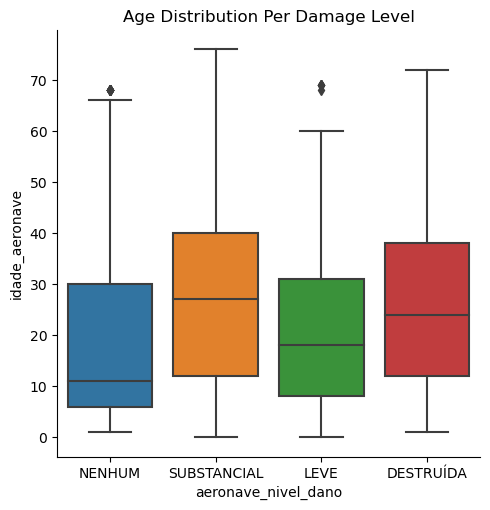

In [104]:
sns.catplot(data=dados, x="aeronave_nivel_dano", y="idade_aeronave", kind="box")
plt.title("Age Distribution Per Damage Level")
plt.show()

We can even think if there is difference between the averages of ages for each category of damage level. To check this, we will use ANOVA.

$H_0$:  **There IS NO** difference between the averages of airplanes ages for each category of damage level.
> $μ_{NENHUM} = μ_{SUBSTANCIAL} = μ_{LEVE} = μ_{DESTRUIDA}$

$H_A$: The average of airplane ages ($µ_{CATEGORY}$) varies across some (or all) groups.

In [179]:
SAMPLE_SIZE_ANOVA = 150

sample_category_none = dados[dados["aeronave_nivel_dano"] == "NENHUM"].sample(n=SAMPLE_SIZE_ANOVA, replace=False, axis=0, ignore_index=True)
sample_category_light = dados[dados["aeronave_nivel_dano"] == "LEVE"].sample(n=SAMPLE_SIZE_ANOVA, replace=False, axis=0, ignore_index=True)
sample_category_substancial = dados[dados["aeronave_nivel_dano"] == "SUBSTANCIAL"].sample(n=SAMPLE_SIZE_ANOVA, replace=False, axis=0, ignore_index=True)
sample_category_destructed = dados[dados["aeronave_nivel_dano"] == "DESTRUÍDA"].sample(n=SAMPLE_SIZE_ANOVA, replace=False, axis=0, ignore_index=True)

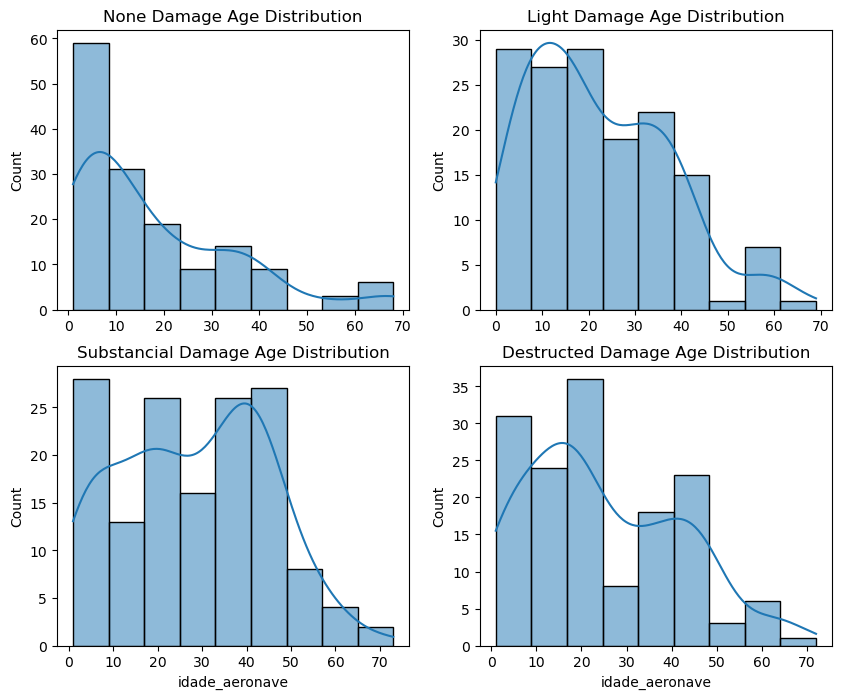

In [180]:
fig, axs = plt.subplots(2,2, figsize=(10,8))

sns.histplot(data=sample_category_none, x="idade_aeronave", kde=True, ax=axs[0,0])
axs[0,0].set_title("None Damage Age Distribution")
axs[0,0].set_xlabel("")

sns.histplot(data=sample_category_light, x="idade_aeronave", kde=True, ax=axs[0,1])
axs[0,1].set_title("Light Damage Age Distribution")
axs[0,1].set_xlabel("")

sns.histplot(data=sample_category_substancial, x="idade_aeronave", kde=True, ax=axs[1,0])
axs[1,0].set_title("Substancial Damage Age Distribution")

sns.histplot(data=sample_category_destructed, x="idade_aeronave", kde=True, ax=axs[1,1])
axs[1,1].set_title("Destructed Damage Age Distribution")

plt.show()

Variance for each category

In [181]:
print("None damage variance:", np.std(sample_category_none["idade_aeronave"]) ** 2)
print("Light damage variance:", np.std(sample_category_light["idade_aeronave"]) ** 2)
print("Substancial damage variance:", np.std(sample_category_substancial["idade_aeronave"]) ** 2)
print("Destructed damage variance:", np.std(sample_category_destructed["idade_aeronave"]) ** 2)

None damage variance: 284.2117333333334
Light damage variance: 232.47328888888896
Substancial damage variance: 275.89333333333326
Destructed damage variance: 291.16515555555566


**Checking conditions to apply ANOVA**

1. **Independence between and within each category**
- Since we are taking simple random samples, this condition is checked.

2. **Approximately normal distribution of each group**
- We can check looking at the charts that the normality is not so approximated, even more in the **None damage** one, which is a right skewed chart. However, **since we are taking large samples (n=150) we will relax this point**.

3. **Constant variance camparing the groups**
- We can consider the variances for each category approximately equal, for this taken sample.

Relaxing the point 2 above, we will apply ANOVA to check if there are differences between the average ages across the 4 groups.

### Applying ANOVA (F-test) for 0.05 significance level

In [186]:
from scipy.stats import f_oneway
ages_none = sample_category_none["idade_aeronave"]
ages_light = sample_category_light["idade_aeronave"]
ages_substancial = sample_category_substancial["idade_aeronave"]
ages_destructed = sample_category_destructed["idade_aeronave"]

alpha_anova = 0.05
f_score, p_value_anova = f_oneway(ages_none, ages_light, ages_substancial, ages_destructed)

if p_value_anova < alpha_anova:
    print(f"For a p-value = {p_value_anova} and alpha = {alpha_anova} we REJECT the null hypothesis!")
else: 
    print(f"For a p-value = {p_value_anova} and alpha = {alpha_anova} we DO NOT REJECT the null hypothesis!")

For a p-value = 1.3864840802832671e-06 and alpha = 0.05 we REJECT the null hypothesis!


### First Conclusion

As we rejected the null hypothesis, we can conclude that there are differences between the averages of ages among the damage levels.

**However, we still do not know which levels are differents from others.** To do that, we will apply the t-test with some modifications for each pair of categories and check which pairs reject the null hypothesis. 

### Applying BONFERRONI correction for $\alpha$

In [219]:
k = len(dados["aeronave_nivel_dano"].unique())
number_of_pairs = k * (k - 1) / 2
alpha_bonferroni = alpha_anova / number_of_pairs

print(f"Number of pairs to compare = {int(number_of_pairs)}")
print(f"α*(Bonferroni) = {alpha_bonferroni}")

Number of pairs to compare = 6
α*(Bonferroni) = 0.008333333333333333


In [191]:
dfg = k - 1
dfe = k * SAMPLE_SIZE_ANOVA - k

print(f"dfG = {dfg}")
print(f"dfE = {dfe}")

dfG = 3
dfE = 596


### Comparing each pair

**Standard error for the difference of proportions**  

$SE = \sqrt{\frac{s_{pooled}²}{n_1} + \frac{s_{pooled}²}{n_2}}$

**Test statistic** 

$T^* = \frac{point \ estimate \ - \ null \ value}{SE}$

**Significance level we will use**  

$\alpha* (Bonferroni) = 0.0083$

In [197]:
all_anova_samples = pd.concat([sample_category_none, sample_category_light,
                               sample_category_substancial, sample_category_destructed], axis=0)
s_pooled = np.std(all_anova_samples["idade_aeronave"])
print("s_pooled =", s_pooled)

s_pooled = 16.87916195589502


In [229]:
damage_levels = ['none', 'light', 'substancial', 'destructed']
anova_samples = [sample_category_none["idade_aeronave"], 
                 sample_category_light["idade_aeronave"], 
                 sample_category_substancial["idade_aeronave"], 
                 sample_category_destructed["idade_aeronave"]
                 ]

null_value_anova = 0

# comparing all pairs
for i in range(k):
    for j in range(i + 1, k):
        level1, level_sample1 = damage_levels[i], anova_samples[i]
        level2, level_sample2 = damage_levels[j], anova_samples[j]
        print(f"Pair ({level1}, {level2}):")

        avg1 = np.mean(level_sample1)
        print(f"    x̄1 ({level1} damage level):", avg1)
 
        avg2 = np.mean(level_sample2)
        print(f"    x̄2 ({level2} damage level):", avg2)
        
        pe = avg1 - avg2
        print("    Point Estimate (x̄1 - x̄2):", pe) 

        SE_anova = sqrt(s_pooled ** 2 / len(level_sample1) + 
                        s_pooled ** 2 / len(level_sample2)
                        )
        print("    SE:", SE_anova)
        
        t_score_anova = (pe - null_value_anova) / SE_anova
        print("    abs t_score:", abs(t_score_anova))

        pvalue_pair = stats.t.sf(abs(t_score_anova), dfe)
        print()

        if pvalue_pair < alpha_bonferroni:
            print(f"    For a p-value of pairs {level1}, {level2} = {pvalue_pair} and alpha bonferroni = {alpha_bonferroni} we REJECT the null hypothesis!")
        else: 
            print(f"    For a p-value of pairs {level1}, {level2} = {pvalue_pair} and alpha bonferroni = {alpha_bonferroni} we DO NOT REJECT the null hypothesis!")
        print()

        


Pair (none, light):
    x̄1 (none damage level): 17.96
    x̄2 (light damage level): 22.326666666666668
    Point Estimate (x̄1 - x̄2): -4.366666666666667
    SE: 1.9490377397862562
    abs t_score: 2.240421813045828

    For a p-value of pairs none, light = 0.012715599810560474 and alpha bonferroni = 0.008333333333333333 we DO NOT REJECT the null hypothesis!

Pair (none, substancial):
    x̄1 (none damage level): 17.96
    x̄2 (substancial damage level): 28.2
    Point Estimate (x̄1 - x̄2): -10.239999999999998
    SE: 1.9490377397862562
    abs t_score: 5.253874663875407

    For a p-value of pairs none, substancial = 1.0382672739881707e-07 and alpha bonferroni = 0.008333333333333333 we REJECT the null hypothesis!

Pair (none, destructed):
    x̄1 (none damage level): 17.96
    x̄2 (destructed damage level): 24.85333333333333
    Point Estimate (x̄1 - x̄2): -6.893333333333331
    SE: 1.9490377397862562
    abs t_score: 3.5367880224265424

    For a p-value of pairs none, destructed = 